In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ASUS\Desktop\movie review\IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
import nltk # Nature language toolkit 
from nltk.corpus import stopwords # corpus : collection of text data (contains collection of common words)
nltk.download('stopwords') #(useless common words like "the", "is", "and")
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize # tokenization : breaking down text into words (even ! is splitted)
import re # used to search , match and clean text 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def clean_text (text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub('<.*?>', '', text)
    words = text.split()   
    #words = [word for word in text if word not in stop_words] # remove common words like "the", "is", "and","was","but"
    return " ".join(words) 
    

In [8]:
df['clean'] = df['review'].apply(clean_text)

In [9]:

df['clean']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production br br the filmin...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: clean, Length: 50000, dtype: object

In [10]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [11]:
print(df['clean'].head(10))

0    one of the other reviewers has mentioned that ...
1    a wonderful little production br br the filmin...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
5    probably my alltime favorite movie a story of ...
6    i sure would like to see a resurrection of a u...
7    this show was an amazing fresh innovative idea...
8    encouraged by the positive comments about this...
9    if you like original gut wrenching laughter yo...
Name: clean, dtype: object


In [12]:
df = df[df['clean'].str.strip() != '']  # Remove rows that are empty after cleaning


In [13]:
df = df.dropna(subset=['clean'])  # remove rows where 'clean' is NaN
df = df[df['clean'].str.strip() != '']  # remove rows that are empty after cleaning

In [14]:
print("Clean column empty rows:", (df['clean'].str.strip() == '').sum())
print("Sample reviews:\n", df['clean'].head(10))


Clean column empty rows: 0
Sample reviews:
 0    one of the other reviewers has mentioned that ...
1    a wonderful little production br br the filmin...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
5    probably my alltime favorite movie a story of ...
6    i sure would like to see a resurrection of a u...
7    this show was an amazing fresh innovative idea...
8    encouraged by the positive comments about this...
9    if you like original gut wrenching laughter yo...
Name: clean, dtype: object


In [15]:
print(df['clean'].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: clean, Length: 50000, dtype: bool


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer # used to convert text into numbers that rep the importance using TF-IDF
vectorizer = TfidfVectorizer(max_features= 5000) # stores only 5000 unique words in the vocabulary


In [17]:
X = vectorizer.fit_transform(df['clean']).toarray()
print(X.shape)

(50000, 5000)


In [18]:
df['sentiment']

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [19]:
df.info('sentiment')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
 2   clean      50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [20]:
print(df['sentiment'].isnull().sum())
df= df.dropna(subset=['sentiment']) # dropna : remves missing values 

0


In [21]:
y = df['sentiment'].map({'positive': 1, 'negative': 0}) #convert labels to binary (label encoding) as machine cant understand 'positvie & negative'
print("Missing values in y:", y.isnull().sum())


Missing values in y: 0


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% will go to testing and 80% to training (idea and most common)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix ,  classification_report

In [ ]:
model = LogisticRegression() #logistic regression cause its good for binary classification
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8944


In [48]:
print("classification_report:",classification_report(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [25]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vector = vectorizer.transform([cleaned]).toarray()
    prediction = model.predict(vector)
    return "Positive" if prediction[0] == 1 else "Negative"

#example
print(predict_sentiment("This movie was amazing! Loved every second."))

Positive


In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[4370  591]
 [ 465 4574]]


In [30]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


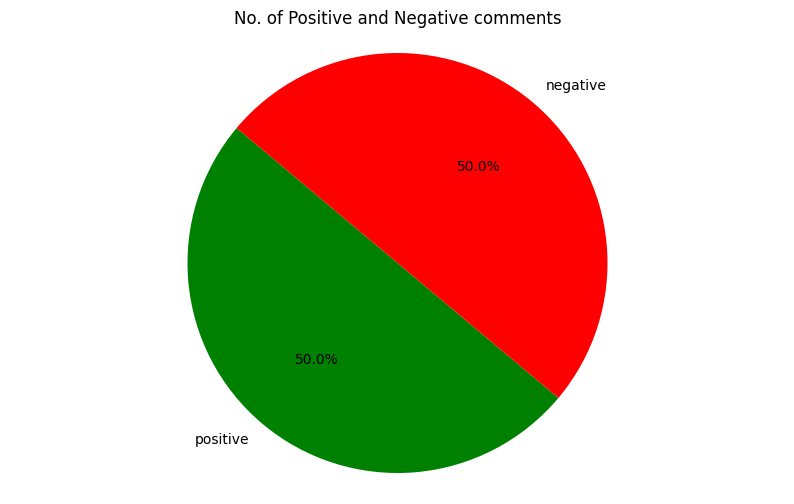

In [32]:
import matplotlib.pyplot as plt 
count = df['sentiment'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title("No. of Positive and Negative comments")
plt.axis('equal')
plt.show()

In [42]:
def movie_genre(text):
    text = text.lower()
    if 'horror' in text:
        return 'Horror'
    elif 'romantic' in text or 'love story' in text or 'romance' in text:
        return 'Romance'
    elif 'action' in text or 'fight' in text or 'battle' in text:
        return 'Action'
    elif 'comedy' in text or 'funny' in text or 'laugh' in text:
        return 'Comedy'
    elif 'drama' in text:
        return 'Drama'
    else:
        return 'Other'

df['genre'] = df['review'].apply(movie_genre)


In [43]:
df['genre']

0        Romance
1         Comedy
2         Comedy
3         Action
4         Action
          ...   
49995      Other
49996      Other
49997     Comedy
49998     Action
49999      Other
Name: genre, Length: 50000, dtype: object

In [44]:
df['genre'].head()
df['genre'].value_counts()

genre
Other      23974
Comedy      9074
Action      7970
Horror      4401
Romance     2761
Drama       1820
Name: count, dtype: int64

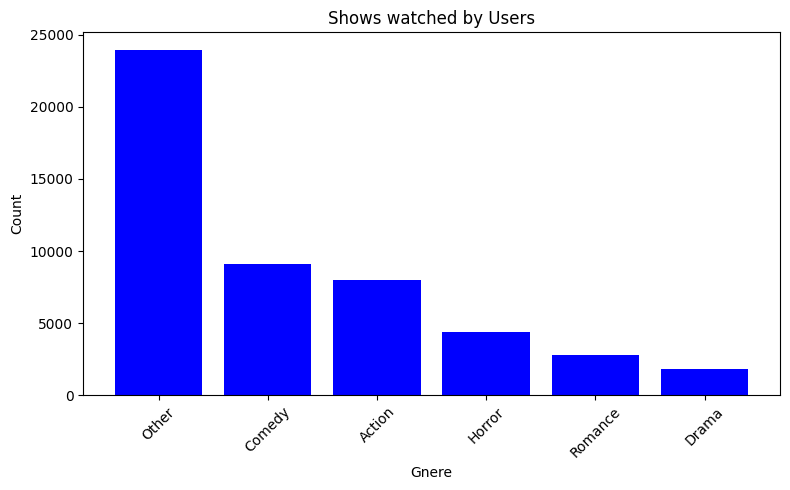

In [47]:
gnere_count = df['genre'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(gnere_count.index,gnere_count.values,color='blue')
plt.title("Shows watched by Users")
plt.xlabel("Gnere")
plt.ylabel("Count")
plt.xticks(rotation=45) #Rotate genre names if they overlap
plt.tight_layout() #used to adjust spacing automatically 
plt.show()

In [28]:
aaaaaaaaaaaaaaaaaaaaaaa

NameError: name 'aaaaaaaaaaaaaaaaaaaaaaa' is not defined